实验内容
>1）了解短时傅里叶变换的原理，并编程实现短时傅里叶函数；<br>
>2）了解语谱图的意义和表现方法，并编程实现；

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用SimHei字体（可以根据需要选择其他字体）
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [5]:
def enframe(x, win, inc):
    frame_length = len(win)
    num_frames = (len(x) - frame_length) // inc + 1

    frameout = np.zeros((num_frames, frame_length))
    for i in range(num_frames):
        start = i * inc
        end = start + frame_length
        frameout[i, :] = x[start:end] * win

    return frameout
# 汉明窗（Hamming Window）
def hamming_window(N):
    return 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(N) / (N - 1))
def FrameTimeC(frameNum, frameLen, inc, fs):
    ll = np.array([i for i in range(frameNum)])
    return ((ll - 1) * inc + frameLen / 2) / fs
def STFFT(x, win, nfft, inc):
    xn = enframe(x, win, inc)
    xn = xn.T
    y = np.fft.fft(xn, nfft, axis=0)
    return y[:nfft // 2, :]


In [6]:
# 读取语音信号
sample_rate, data = wavfile.read('../01.wav')
# 设置参数
framelen = 256
inc = 128
frameNum = 1 + int((len(data) - framelen) / inc)

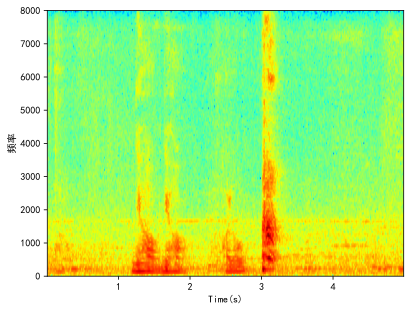

In [8]:
wlen = 256
nfft = wlen
win = hamming_window(wlen)
inc = 128
fs=sample_rate
y = STFFT(data, win, nfft, inc)
freq = [i * fs / wlen for i in range(wlen // 2)]
frame = FrameTimeC(y.shape[1], wlen, inc, fs)

plt.matshow(np.log10(np.flip(np.abs(y)*np.abs(y), 0)))
plt.colorbar()
plt.close()

plt.specgram(data, NFFT=256, Fs=fs, window=np.hamming(256),cmap='jet')
plt.ylabel('频率')
plt.xlabel('Time(s)')
plt.show()